In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

from IPython.display import display

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.14.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.19.0


In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [3]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print('예측된 유니크 레이블: {}'.format(np.unique(pred_most_frequent)))
print('테스트 점수: {:.3f}'.format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.896


In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수: {:.3f}'.format(tree.score(X_test, y_test)))

테스트 점수: 0.918


In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수: {:.3f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수: {:.3f}'.format(logreg.score(X_test, y_test)))

dummy 점수: 0.829
logreg 점수: 0.978


In [8]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬:\n{}'.format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


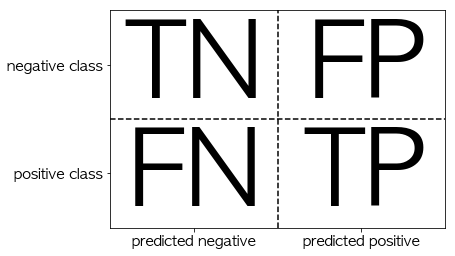

In [9]:
mglearn.plots.plot_binary_confusion_matrix()

In [10]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델:')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리:')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀:')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[356  47]
 [ 43   4]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[401   2]
 [  8  39]]


In [11]:
from sklearn.metrics import f1_score

print('빈도 기반 더미 모델의 f1 score: {:.3f}'.format(f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1 score: {:.3f}'.format(f1_score(y_test, pred_dummy)))
print('트리 모델의 f1 score: {:.3f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 score: {:.3f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.000
무작위 더미 모델의 f1 score: 0.082
트리 모델의 f1 score: 0.554
로지스틱 회귀 모델의 f1 score: 0.886


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9 아님','9']))

             precision    recall  f1-score   support

       9 아님       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님','9']))

             precision    recall  f1-score   support

       9 아님       0.89      0.88      0.89       403
          9       0.08      0.09      0.08        47

avg / total       0.81      0.80      0.80       450



In [15]:
print(classification_report(y_test, pred_logreg, target_names=['9 아님','9']))

             precision    recall  f1-score   support

       9 아님       0.98      1.00      0.99       403
          9       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



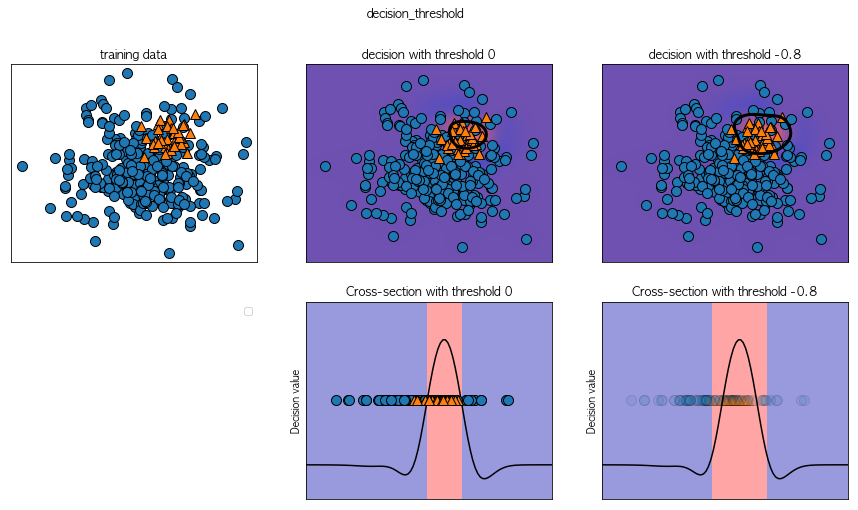

In [17]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [18]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [19]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [21]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

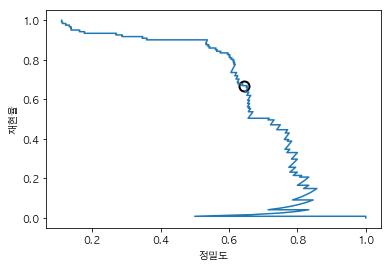

In [23]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=(7.0, 2), random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='임계값 0', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')

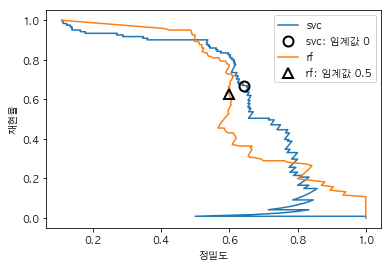

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='svc: 임계값 0', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10,
        label='rf: 임계값 0.5', fillstyle='none', mew=2)
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

In [25]:
print('랜덤 포레스트의 f1 score: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('svc의 f1 score: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1 score: 0.610
svc의 f1 score: 0.656


In [26]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('랜덤 포레스트의 평균 정밀도: {:.3f}'.format(ap_rf))
print('svc의 평균 정밀도: {:.3f}'.format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


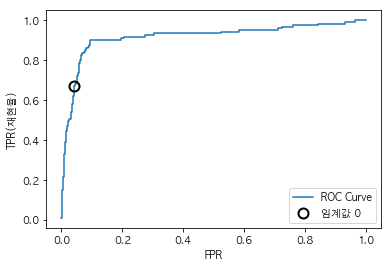

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(재현율)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

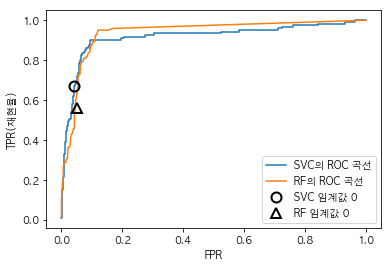

In [30]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='SVC의 ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='RF의 ROC 곡선')

plt.xlabel('FPR')
plt.ylabel('TPR(재현율)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='SVC 임계값 0', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
        label='RF 임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [31]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print('랜덤 포레스트의 AUC: {:.3f}'.format(rf_auc))
print('SVC의 AUC: {:.3f}'.format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00, 정확도 = 0.896, AUC = 0.500
gamma = 0.10, 정확도 = 0.896, AUC = 0.958
gamma = 0.01, 정확도 = 0.896, AUC = 1.000


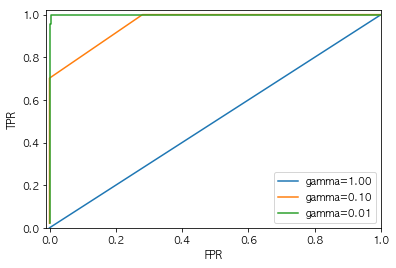

In [32]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f}, 정확도 = {:.3f}, AUC = {:.3f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

In [34]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도: {:.3f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬:\n{}'.format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


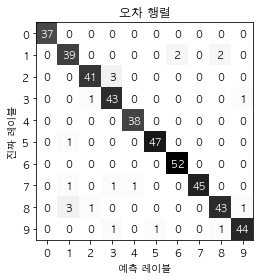

In [35]:
scores_imsage = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel = '진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d'
)
plt.title('오차 행렬')
plt.gca().invert_yaxis()

In [36]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [37]:
print('micro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('macro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [39]:
from sklearn.model_selection import cross_val_score

print('기본 평가 지표: {}'.format(cross_val_score(SVC(), digits.data, digits.target == 9)))

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy')
print('정확도 지표: {}'.format(explicit_accuracy))

roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')
print('AUC 지표: {}'.format(roc_auc))

기본 평가 지표: [0.89983306 0.89983306 0.89983306]
정확도 지표: [0.89983306 0.89983306 0.89983306]
AUC 지표: [0.99372294 0.98957947 0.99594929]


In [41]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print('정확도 지표를 사용한 그리드 서치')
print('최적의 매개변수:', grid.best_params_)
print('최상의 교차 검증 점수 (정확도): {:.3f}'.format(grid.best_score_))
print('테스트 세트 AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('테스트 세트 정확도: {:.3f}'.format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 매개변수: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도): 0.970
테스트 세트 AUC: 0.992
테스트 세트 정확도: 0.973


In [42]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print('AUC 지표를 사용한 그리드 서치')
print('최적의 매개변수:', grid.best_params_)
print('최상의 교차 검증 점수 (AUC): {:.3f}'.format(grid.best_score_))
print('테스트 세트 AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('테스트 세트 정확도: {:.3f}'.format(grid.score(X_test, y_test)))

AUC 지표를 사용한 그리드 서치
최적의 매개변수: {'gamma': 0.01}
최상의 교차 검증 점수 (AUC): 0.997
테스트 세트 AUC: 1.000
테스트 세트 정확도: 1.000


In [44]:
from sklearn.metrics.scorer import SCORERS

print('가능한 평가 방식:\n{}'.format(sorted(SCORERS.keys())))

가능한 평가 방식:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
